# Import the requirments and create the dataframe.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
#Make a list that hold all paths of each dataset.
file_list = [r"C:\Users\Enrique\Documents\DS4A\Capstone Project\Datasets\laucnty15.csv",
r"C:\Users\Enrique\Documents\DS4A\Capstone Project\Datasets\laucnty16.csv",
r"C:\Users\Enrique\Documents\DS4A\Capstone Project\Datasets\laucnty17.csv",
r"C:\Users\Enrique\Documents\DS4A\Capstone Project\Datasets\laucnty18.csv",
r"C:\Users\Enrique\Documents\DS4A\Capstone Project\Datasets\laucnty19.csv",
r"C:\Users\Enrique\Documents\DS4A\Capstone Project\Datasets\laucnty20.csv",
r"C:\Users\Enrique\Documents\DS4A\Capstone Project\Datasets\laucnty21.csv"
]
#Initiate the dataframe by calling the first element in the list.
main_dataframe = pd.DataFrame(pd.read_csv(file_list[0], sep=',', skiprows=5 ))

#Loop through the list and append dataframes to create the main dataframe.
for i in range(1, len(file_list)):
    data = pd.read_csv(file_list[i], sep=',', skiprows=5 )
    df = pd.DataFrame(data)
    main_dataframe = pd.concat([main_dataframe,df], axis=0, ignore_index=True)
len(main_dataframe.index)   #check the length for sanity


22556

In [4]:
#rename the blank columns to what the website declares the columns to be.
Labor_force_df = main_dataframe.rename(
    columns={"Unnamed: 0":"LAUS Code",
    "Unnamed: 1":"State FIPS Code",
    "Unnamed: 2":"County FIPS Code",
    "Unnamed: 3":"County Name/State Abbreviation",
    "Unnamed: 4":"Year",
    "Unnamed: 5":"BLANK",
    "Unnamed: 6":"Labor Force",
    "Unnamed: 7":"Employed",
    "Unnamed: 8":"Unemployed",
    "Unnamed: 9":"Unemploy-ment Rate (%)"
    }
)
Labor_force_df = Labor_force_df.drop(columns="BLANK") #We drop an empty column
Labor_force_df.head(1)  #check columns if they are renamed and the empty dropped.

,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemploy-ment Rate (%)
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2015.0,"25,541","24,206","1,335",5.2


# Clean up the dataset:
### Profile the Nulls and data that could be trouble:

In [5]:
#COUNT THE NULLS ACROSS THE DATAFRAME
Labor_force_df.isnull().sum()    #sums up the nulls in the dataset per column
index_null_values = pd.DataFrame(Labor_force_df["Year"].isnull().sort_values(ascending= False).head(21))
index_null_values = list(index_null_values.index)  #assigns the nulls to a list so we can loop and inspect the whole row output
for i in index_null_values:
    print("INDEX",i)
    print(Labor_force_df.iloc[i])

INDEX 22555
LAUS Code                         April 15, 2022
State FIPS Code                              NaN
County FIPS Code                             NaN
County Name/State Abbreviation               NaN
Year                                         NaN
Labor Force                                  NaN
Employed                                     NaN
Unemployed                                   NaN
Unemploy-ment Rate (%)                       NaN
Name: 22555, dtype: object
INDEX 9665
LAUS Code                         April 15, 2022
State FIPS Code                              NaN
County FIPS Code                             NaN
County Name/State Abbreviation               NaN
Year                                         NaN
Labor Force                                  NaN
Employed                                     NaN
Unemployed                                   NaN
Unemploy-ment Rate (%)                       NaN
Name: 9665, dtype: object
INDEX 16108
LAUS Code                     

In [6]:
#DROP THE ROWS IN THE DATAFRAME 
Labor_force_df = Labor_force_df.drop(index=index_null_values)
Labor_force_df.isnull().sum()
Labor_force_df.dtypes
#Remove the commas from numeric columns:
Labor_force_df[['Labor Force','Employed','Unemployed']] = Labor_force_df[['Labor Force','Employed','Unemployed']].replace(',','', regex=True)
#Uh Oh! We tried running the below command (to convert datatypes) but found unlabeled nulls:
"""Labor_force_df = Labor_force_df.astype({'Labor Force':'float64','Employed' : 'float64', 'Unemployed' : 'float64', 'Unemploy-ment Rate (%)': 'float64'})"""
#This line lists the 'N.A.' strings in the dataframe.
Labor_force_df[Labor_force_df.eq("N.A.").any(1)]


,LAUS Code,State FIPS Code,County FIPS Code,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemploy-ment Rate (%)
19252,CN7200100000000,72.0,1.0,"Adjuntas Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
19253,CN7200300000000,72.0,3.0,"Aguada Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
19254,CN7200500000000,72.0,5.0,"Aguadilla Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
19255,CN7200700000000,72.0,7.0,"Aguas Buenas Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
19256,CN7200900000000,72.0,9.0,"Aibonito Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
...,...,...,...,...,...,...,...,...,...
19325,CN7214500000000,72.0,145.0,"Vega Baja Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
19326,CN7214700000000,72.0,147.0,"Vieques Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
19327,CN7214900000000,72.0,149.0,"Villalba Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.
19328,CN7215100000000,72.0,151.0,"Yabucoa Municipio, PR",2020.0,N.A.,N.A.,N.A.,N.A.


### What is going on?
At a glance, the data in Puerto Rico 2020 is missing.
We cross-reference the source website to check that only the year 2020 is missing.
2019 and 2021 data is present, however.

# Is it worth filling in the missing data for Puerto Rico?

According to this article: [Puerto is not responding to the 2020 census](https://www.puertoricoreport.com/puerto-rico-is-not-responding-to-the-2020-census/#.Y4rDDXbMJro)

In an effort to either fill or get rid of the data, we will explore the year 2019 and 2021 to see if interpolation can help us.

## The team has come to a conclusion to exluded territories (Puerto Rico) from the data. This leaves us to drop specific rows rather than attend to the missing values.


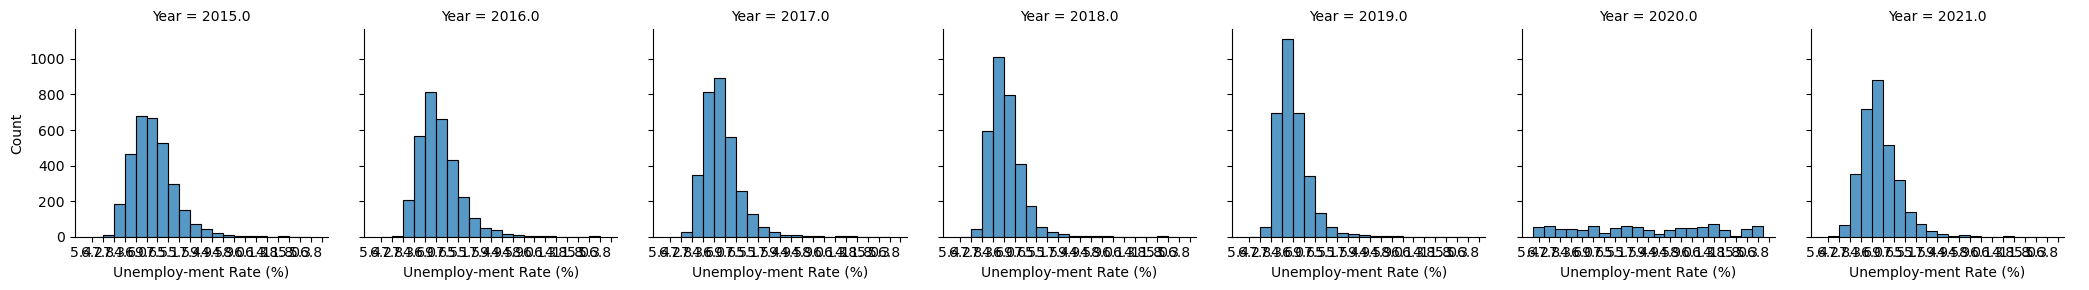

In [7]:
#We now make two dataframes of the Puerto Rico data before and after the nulls
Master_df = Labor_force_df[Labor_force_df['State FIPS Code'] != 72.0]
Master_df
#sns.histplot(data = Master_df, x = 'Unemploy-ment Rate (%)')
g = sns.FacetGrid(data = Master_df, col = 'Year')
g.map_dataframe(sns.histplot, x = 'Unemploy-ment Rate (%)', binwidth = 1, binrange = (0,20))

# Preliminary insights
 - Nulls were dropped and made less than 1 percent of the dataset.
 - Multiple histograms show a large change in unemployment during covid. (Year 2020 as shown above)
 - 

In [8]:
Master_df[Master_df['Year']== 2021.0]['Unemploy-ment Rate (%)'].describe()
Master_df['Unemploy-ment Rate (%)'].astype(float).describe()

count    21989.000000
mean         4.973578
std          2.036289
min          0.800000
25%          3.500000
50%          4.600000
75%          6.000000
max         24.600000
Name: Unemploy-ment Rate (%), dtype: float64

In [11]:
#export the dataframe to a csv file for merging with the team.
Master_df.to_csv('Unemployment_master.csv')